In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [15]:
url = "https://raw.githubusercontent.com/AbbasHussain72/PNEC-CS-333-Applied-AI-ML/main/labs/Lab-03_LR_SVC/Housing.csv"
df = pd.read_csv(url)
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


# Exploratory Data Analysis - EDA

## 2.1 Data info and description

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 13)


## 2.2 Target Variable Analysis: Price Distribution

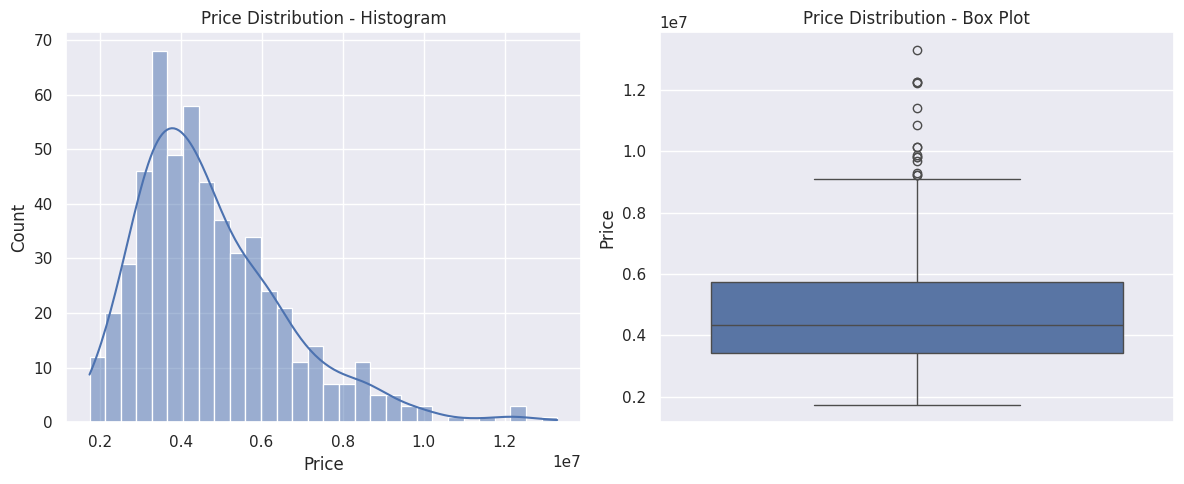

Price Skewness: 1.21
Price Kurotsis: 1.96


In [5]:
# Visualizing the price distribution.

plt.figure(figsize=(12, 5)) #Setting the figure size.

# Left: Histogram
plt.subplot(1, 2, 1)
sns.histplot(df["price"], kde=True, bins=30)
plt.title("Price Distribution - Histogram")
plt.xlabel("Price", fontsize=12)

# Right: Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df["price"])
plt.title("Price Distribution - Box Plot")
plt.ylabel("Price", fontsize=12)

plt.tight_layout()
plt.show()

# Calculating skewness and kurtosis of the price distribution.
skewness = df["price"].skew()
kurtosis = df["price"].kurt()
print(f"Price Skewness: {skewness:.2f}")
print(f"Price Kurotsis: {kurtosis:.2f}")

Modeling effect: The price variable is right-skewed (Skewness: 1.21). This indicates that most houses are concentrated in the lower price range, but high-priced outliers stretch the distribution to the right.

Distribution shape: Regression models (especially Linear Regression) prefer the target variable to be close to a normal distribution. Before modeling, we might consider applying a logarithmic transformation to reduce this skewness.

## 2.3 LabelEncoding

In [16]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = [
    "mainroad",
    "guestroom",
    "basement",
    "hotwaterheating",
    "airconditioning",
    "prefarea"
]
df_encoded = df.copy()
le = LabelEncoder()

for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [17]:
# Convert to Dummy Variable

df_encoded_status = pd.get_dummies(df_encoded,columns=['furnishingstatus'],
    drop_first=True
)
# Convert True/False to 0/1
df_encoded_status = df_encoded_status.astype(int)

In [19]:
df1 = df_encoded_status.copy()
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


##2.3 Relationship Between Numerical Features

<Axes: >

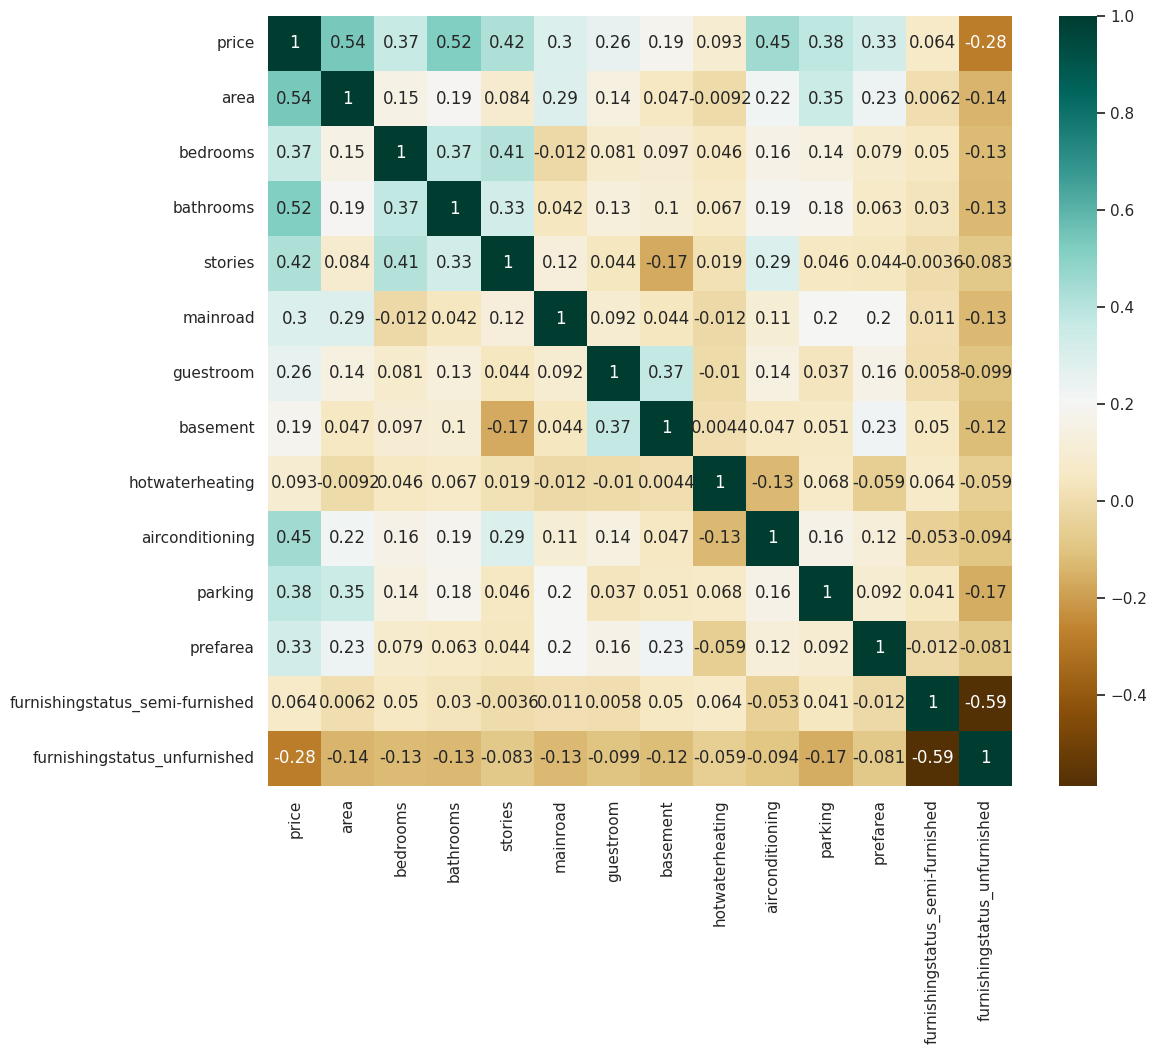

In [21]:
c = df1.corr()
plt.figure(figsize=(12,10))
sns.heatmap(c,cmap="BrBG",annot=True)

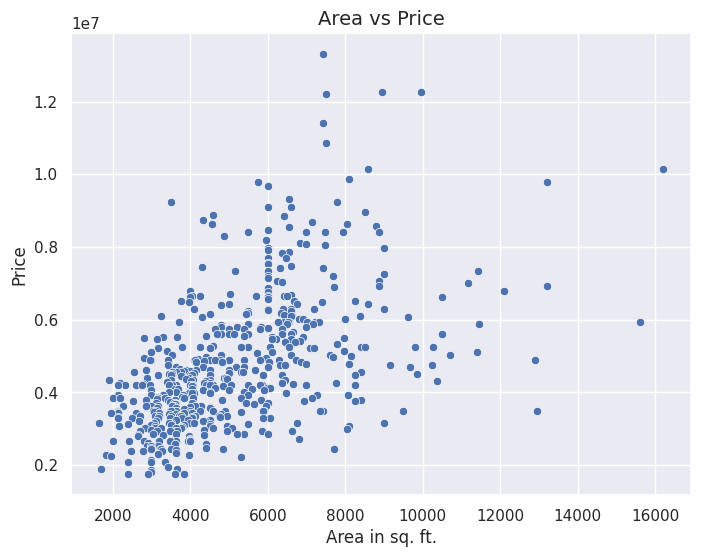

In [22]:
# Examining the relationship between Area and Price.

# Creating a scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="area", y="price", data=df1)
plt.title(f"Area vs Price", fontsize=14)
plt.xlabel("Area in sq. ft.", fontsize=12)
plt.ylabel("Price", fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Train Test Split

In [25]:
# Importing necessary libraries.
from sklearn.model_selection import train_test_split # For splitting the dataset.
from sklearn.preprocessing import MinMaxScaler # For Scaling the features.

X = df1.drop("price", axis=1)
y = df1["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# Regression Summary → Final feature selection
##--------MULTIVARIENT ANALYSIS---------------

In [ ]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     63.79
Date:                Mon, 16 Feb 2026   Prob (F-statistic):           1.00e-85
Time:                        09:14:03   Log-Likelihood:                -5797.3
No. Observations:                 381   AIC:                         1.162e+04
Df Residuals:                     367   BIC:                         1.168e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     


🔎 Insight
R2 :69.3% of the variance in house prices in the training data is explained by the independent variables in the model. This is a very good value for a starting model
Adj.R2 : The Adjusted R2 value is close to R2, which means the model does not contain too many unnecessary variables.
Prob(F−statistic) : This value is very close to 0. It means the model performs significantly better than a simple model with only the intercept.

In [ ]:
p_values = model.pvalues
significant_features = p_values[p_values < 0.05]
print(significant_features)
nonsignificant_features = p_values[p_values > 0.05]
print(nonsignificant_features)

area                            8.725446e-19
bathrooms                       9.791751e-18
stories                         4.221983e-08
mainroad                        1.224796e-02
basement                        1.732797e-04
hotwaterheating                 9.189617e-03
airconditioning                 7.068583e-08
parking                         7.401986e-06
prefarea                        1.033873e-04
furnishingstatus_unfurnished    6.424888e-03
dtype: float64
const                              0.747565
bedrooms                           0.319087
guestroom                          0.064006
furnishingstatus_semi-furnished    0.347224
dtype: float64


In [ ]:
X_train_final = X_train[significant_features.index]
X_test_final = X_test[significant_features.index]

In [ ]:
X_train_final

,area,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_unfurnished
126,7160,1,1,1,1,0,0,2,1,1
363,3584,1,1,1,0,1,0,0,0,0
370,4280,1,1,1,0,0,1,2,0,0
31,7000,1,4,1,0,0,1,2,0,0
113,9620,1,1,1,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...
71,6000,2,4,1,0,0,1,0,0,1
106,5450,2,1,1,1,0,1,0,1,0
270,4500,2,3,1,0,1,0,1,0,0
435,4040,1,1,1,0,0,0,0,0,1


# Scaling

In [51]:
# 3. Applying Feature Scaling.
from sklearn.preprocessing import StandardScaler
# Only numerical features should be scaled.
numeric_vars = ["area", "bedrooms","bathrooms", "stories", "parking"]

# Initializing the MinMaxScaler.
# scaler = MinMaxScaler()
scaler = StandardScaler()

# Fitting the MinMaxScaler ONLY to the TRAINING data (X_train) and transforming it.
X_train[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])

# Transforming the Test data ONLY - We do not fit.
X_test[numeric_vars] = scaler.transform(X_test[numeric_vars])

print("--- First 5 Rows of Scaled Training Data ---")
# Displaying Scaled numerical columns for checking.
print(X_train[numeric_vars].head().to_markdown(index=False, numalign="left", stralign="left", floatfmt=".2f"))


#ONLY FOR SVRR
# Scale y
scaler_y = StandardScaler()

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()

--- First 5 Rows of Scaled Training Data ---
| area   | bedrooms   | bathrooms   | stories   | parking   |
|:-------|:-----------|:------------|:----------|:----------|
| 0.93   | 0.06       | -0.55       | -0.91     | 1.59      |
| -0.71  | -1.27      | -0.55       | -0.91     | -0.80     |
| -0.39  | -1.27      | -0.55       | -0.91     | 1.59      |
| 0.86   | 0.06       | -0.55       | 2.57      | 1.59      |
| 2.07   | 0.06       | -0.55       | -0.91     | 1.59      |


In [28]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
126,0.378694,0.4,0.000000,0.000000,1,0,1,0,0,0.666667,1,0,1
363,0.132921,0.2,0.000000,0.000000,1,0,0,1,0,0.000000,0,1,0
370,0.180756,0.2,0.000000,0.000000,1,0,0,0,1,0.666667,0,1,0
31,0.367698,0.4,0.000000,1.000000,1,0,0,0,1,0.666667,0,1,0
113,0.547766,0.4,0.000000,0.000000,1,0,1,0,0,0.666667,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.298969,0.6,0.333333,1.000000,1,0,0,0,1,0.000000,0,0,1
106,0.261168,0.6,0.333333,0.000000,1,0,1,0,1,0.000000,1,1,0
270,0.195876,0.4,0.333333,0.666667,1,0,0,1,0,0.333333,0,0,0
435,0.164261,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,0,1


# LR Model Building and Training

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(X_test)

In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# R-squared
r2 = r2_score(y_test, y_pred)
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# MAE
mae = mean_absolute_error(y_test, y_pred)

print("Model Performance:")
print("R² Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)


Model Performance:
R² Score: 0.6463350878895877
RMSE: 1234106.7496376848
MAE: 920392.9397607954


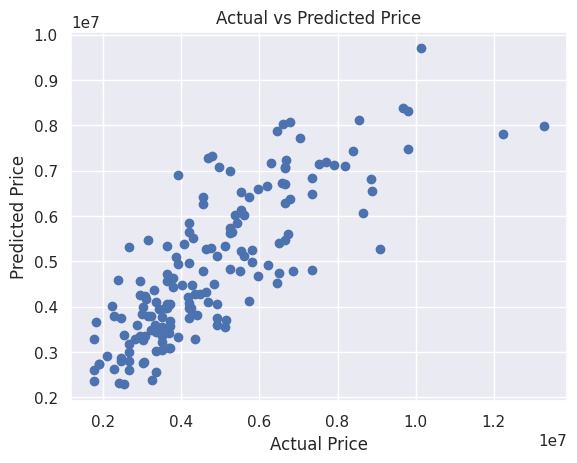

In [32]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

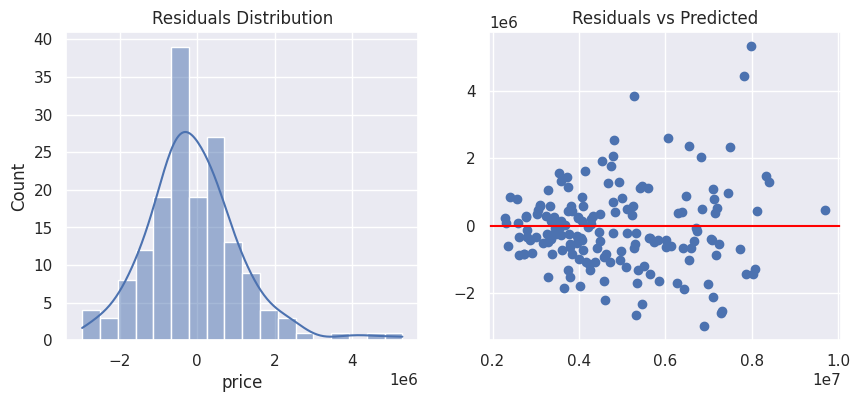

In [33]:
# Calculate residuals
residuals = y_test - y_pred


# Histogram of residuals
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")


# Residuals vs Predicted
plt.subplot(1,2,2)
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.title("Residuals vs Predicted")


plt.show()

# SVR: Support Vector Regression

In [56]:
from sklearn.svm import SVR
# svr = SVR()
svr = SVR(kernel='rbf', C=100, gamma=0.01)
svr.fit(X_train, y_train_scaled)



y_pred_svr = svr.predict(X_test)

# Convert back to original scale
y_pred_svr = scaler_y.inverse_transform(y_pred_svr.reshape(-1,1))

r2 = r2_score(y_test, y_pred_svr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mae = mean_absolute_error(y_test, y_pred_svr)

print("SVR Model Performance\n")
print("R² Score:", round(r2,3))
print("RMSE:", round(rmse,0))
print("MAE:", round(mae,0))


SVR Model Performance

R² Score: 0.636
RMSE: 1252557.0
MAE: 934925.0


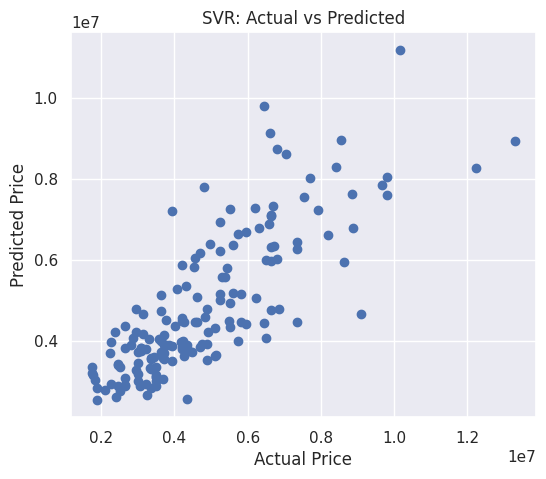

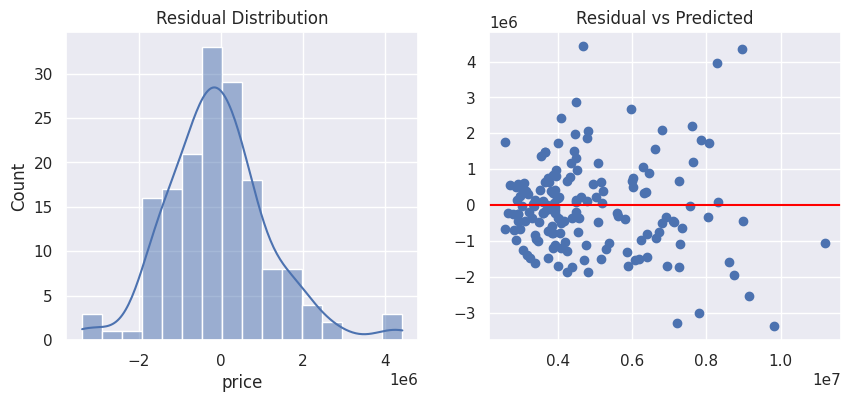

In [58]:
# ============================================
# 8. Actual vs Predicted Plot
# ============================================

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_svr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("SVR: Actual vs Predicted")
plt.show()


# ============================================
# 9. Residual Analysis
# ============================================

y_pred_svr = y_pred_svr.ravel()
residuals = y_test - y_pred_svr

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.subplot(1,2,2)
plt.scatter(y_pred_svr, residuals)
plt.axhline(0, color='red')
plt.title("Residual vs Predicted")
plt.show()